In [1]:
import os
import sys

from glob import glob
from typing import List, Tuple

import numpy as np
import xarray as xr
import xcdat as xc
import xskillscore as xscore

# Personal Data Loader
sys.path.append('../pipeline')
from data_loader import DataLoader

/glade/work/zespinosa/conda-envs/cenv/lib/python3.8/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.27.0
  warnings.warn(


In [55]:
xr.open_dataset("/glade/work/zespinosa/data/era5/monthly/ERA5_monthly_1979-01_2023-12_2m_temperature.nc")

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, expver: 2, time: 538)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-10-01
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-17 08:02:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
def era5_pressure_level(dataloader):
    myvars = [
        'geopotential', 
        'temperature', 
        'u_component_of_wind',
        'v_component_of_wind',
    ]
    for cvar in myvars:
        era5_data = dataloader.get_era5_data(
            level="pressure", 
            info={
                "vars": [cvar],
                "years": [str(yr) for yr in list(range(1979, 2024))],
                "months": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10","11", "12"],
                "area":[90, -180, -90, 180],
                "time":"00:00",
                "pressure_levels": ["1000", "500"],
                "save_name": f"ERA5_monthly_1979-01_2023-12_plevels_{cvar}"
            }
        )
        print(era5_data)

In [7]:
def era5_single_level(dataloader):
    myvars = [
        '10m_u_component_of_wind', 
        '10m_v_component_of_wind',
        '10m_wind_speed',
        '2m_temperature', 
        'mean_sea_level_pressure', 
        'sea_surface_temperature',
    ]
    for cvar in myvars:
        era5_data = dataloader.get_era5_data(
            level="single", 
            info={
                "vars": [cvar],
                "years": [str(yr) for yr in list(range(1979, 2024))],
                "months": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10","11", "12"],
                "area":[90, -180, -90, 180],
                "time":"00:00",
                "save_name": f"ERA5_monthly_1979-01_2023-12_{cvar}"
            }
        )
        print(era5_data)


In [3]:
TESTING = False

dataloader = DataLoader(
    root = [
        "/glade/campaign/univ/uwas0118/scratch/archive/1950_2015/",
        "/glade/scratch/zespinosa/archive/cesm2.1.3_BHISTcmip6_f09_g17_ERA5_nudge/", 
        "/glade/scratch/zespinosa/archive/cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge/"
    ],
    era5_root="/glade/work/zespinosa/data/era5/monthly"
)
ice_cesm2 = dataloader.get_cesm2_data(
    comp="ice",
    myvars=["aice", "daidtt", "daidtd", "dvidtt", "dvidtd", "sithick", "uvel", "vvel"],
    testing=TESTING,
)


# Test ERA5
# era5_single_level(dataloader)
# era5_pressure_level(dataloader)


Loading ice data from 900 files...
['/glade/campaign/univ/uwas0118/scratch/archive/1950_2015/ice/hist/cesm2.1.3_BHISTcmip6_f09_g17_ERA5_nudge.cice.h.1950-01.nc', '/glade/campaign/univ/uwas0118/scratch/archive/1950_2015/ice/hist/cesm2.1.3_BHISTcmip6_f09_g17_ERA5_nudge.cice.h.1950-02.nc', '/glade/campaign/univ/uwas0118/scratch/archive/1950_2015/ice/hist/cesm2.1.3_BHISTcmip6_f09_g17_ERA5_nudge.cice.h.1950-03.nc', '/glade/campaign/univ/uwas0118/scratch/archive/1950_2015/ice/hist/cesm2.1.3_BHISTcmip6_f09_g17_ERA5_nudge.cice.h.1950-04.nc', '/glade/campaign/univ/uwas0118/scratch/archive/1950_2015/ice/hist/cesm2.1.3_BHISTcmip6_f09_g17_ERA5_nudge.cice.h.1950-05.nc']


ERROR 1: PROJ: proj_create_from_database: Open of /glade/work/zespinosa/conda-envs/cenv/share/proj failed


# NO ENSO

In [4]:
TESTING=False

dataloader_enso = DataLoader(
    root = [
        "/glade/scratch/zespinosa/archive/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge"
    ],
    era5_root="/glade/work/zespinosa/data/era5/monthly"
)
no_enso_ice_cesm2 = dataloader_enso.get_cesm2_data(
    comp="ice",
    myvars=["aice", "daidtt", "daidtd", "dvidtt", "dvidtd", "sithick", "uvel", "vvel"],
    testing=TESTING,
)
no_enso_ice_cesm2

Loading ice data from 12 files...
['/glade/scratch/zespinosa/archive/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge/ice/hist/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge.cice.h.2023-01.nc', '/glade/scratch/zespinosa/archive/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge/ice/hist/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge.cice.h.2023-02.nc', '/glade/scratch/zespinosa/archive/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge/ice/hist/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge.cice.h.2023-03.nc', '/glade/scratch/zespinosa/archive/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge/ice/hist/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge.cice.h.2023-04.nc', '/glade/scratch/zespinosa/archive/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge/ice/hist/NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge.cice.h.2023-05.nc']


<xarray.Dataset>
Dimensions:  (time: 12, nlat: 384, nlon: 320)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-15 2023-02-15 ... 2023-12-15
    lon      (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lat      (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    aice     (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    uvel     (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    vvel     (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    dvidtt   (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    dvidtd   (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    daidtt   (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    daidtd   (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    sithick  (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
Attributes:
    title:             NO_ENSO_cesm2.1.3_BSSP370cmip6_f09_g17_ERA5_nudge
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 20230201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2023-11-05 at 22:55
    io_flavor:         io_pio

In [ ]:
enso = xr.concat([
    ice_cesm2.sel(time=slice("1950-01-15", "2022-12-15")), 
    no_enso_ice_cesm2,
], dim="time")

<xarray.Dataset>
Dimensions:  (time: 888, nlat: 384, nlon: 320)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-15 1950-02-15 ... 2023-12-15
    lon      (nlat, nlon) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    lat      (nlat, nlon) float32 -79.22 -79.22 -79.22 -79.22 ... nan nan nan
Dimensions without coordinates: nlat, nlon
Data variables:
    aice     (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    uvel     (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    vvel     (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    dvidtt   (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    dvidtd   (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    daidtt   (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    daidtd   (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    sithick  (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
Attributes:
    title:             cesm2.1.3_BHISTcmip6_f09_g17_ERA5_nudge
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 19500201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2023-10-10 at 16:31
    io_flavor:         io_pio

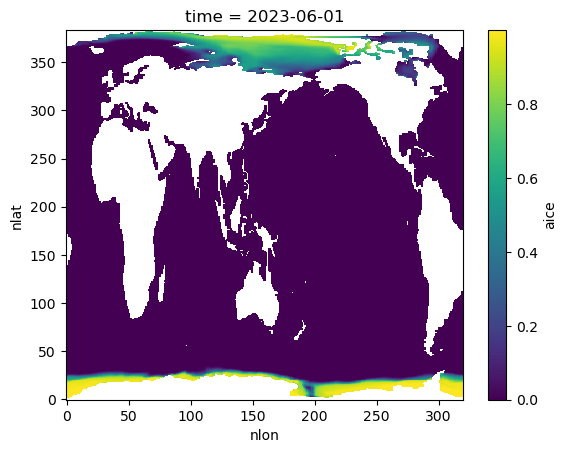

In [54]:
enso["aice"].resample(time="QS-DEC").mean(dim="time").sel(time="2023-06").squeeze().plot()
enso

In [5]:
diff = ice_cesm2.isel(time=slice(900-24,900-12))["aice"] - no_enso_ice_cesm2["aice"]

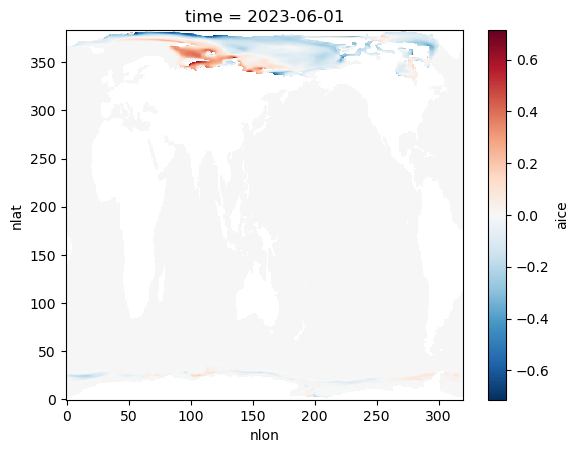

In [26]:
# diff.isel(time=9).plot()
diff.resample(time="QS-DEC").mean(dim="time").sel(time="2023-06").squeeze().plot()

In [6]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import matplotlib
import matplotlib.animation as animation
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_stationary_sp(nplots: int = 3, minLon: int = -180, maxLon: int = 180):
    """
    TODO: Add Doc String
    Create a stationary centered on south pole (Longitude: [minLon,maxLon]; Latitude: [-90,-60]
    Returns:
        ax, fig
    """
    # Create subplots
    fig, axs = plt.subplots(nrows=1, ncols=nplots, figsize=[10,10], subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
    fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.15)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    # Add properties to axes
    if nplots == 1: 
        axs = [axs]
        
    for ax in axs:
        # Limit the map to -60 degrees latitude and below.
        ax.set_extent([minLon, maxLon, -90, -50], ccrs.PlateCarree())

        ax.gridlines(draw_labels=True, color="black", linestyle="dashed", zorder=101)
        ax.tick_params(which="both", zorder=103)

        ax.add_feature(cartopy.feature.LAND, facecolor="grey", edgecolor="black", zorder=3)
        ax.add_feature(cartopy.feature.OCEAN, facecolor="white")


        ax.set_boundary(circle, transform=ax.transAxes)

    return fig, axs


In [7]:
def spatial_obs_plot(dfs, cmap_info, save_info):
    fig, axes = plot_stationary_sp(nplots=len(dfs.keys()))

    for i, ((key, ds), ax) in enumerate(zip(dfs.items(), axes)):

        if not cmap_info["shared"]:
            levels = cmap_info["levels"][i]
            units = cmap_info["units"][i]
            cmap = cmap_info["cmap"][i]
        else: 
            levels = cmap_info["levels"]
            units = cmap_info["units"]
            cmap = cmap_info["cmap"]

        # Create contour plot
        img = ax.contourf(
            ds["ds"].lon.values,
            ds["ds"].lat.values,
            ds["ds"].values,
            transform=ccrs.PlateCarree(), 
            levels=levels,
            extend="both",
            cmap=cmap,
        )

        # Plot Winds if given
        if "wind" in ds.keys():
            lat_step, lon_step = 5, 5 
            ax.quiver(
                x=ds["wind"][0].lon[::lon_step],
                y=ds["wind"][0].lat[::lat_step],
                u=ds["wind"][0].values[::lat_step, ::lon_step], 
                v=ds["wind"][1].values[::lat_step, ::lon_step], 
                color="black", 
                scale=ds["wind"][2],
                transform=ccrs.PlateCarree(),
            )

        if not cmap_info["shared"]:
            cbar = plt.colorbar(img, ax=ax, orientation="vertical", fraction=.046, pad=0.04)
            cbar.ax.set_title(units, fontweight="bold")

        # Set properties
        ax.set_title(ds["title"], loc="left", fontweight="bold")


    if len(dfs) == 3: 
        fraction = .016
    else: 
        fraction = .026

    if cmap_info["shared"]:
        cbar = fig.colorbar(img, ax=ax, orientation="vertical", fraction=fraction, pad=0.04)
        cbar.ax.set_title(cmap_info["units"], fontweight="bold")

    if save_info["save"]:
        plt.savefig(save_info["path"], dpi=save_info["dpi"], bbox_inches="tight")


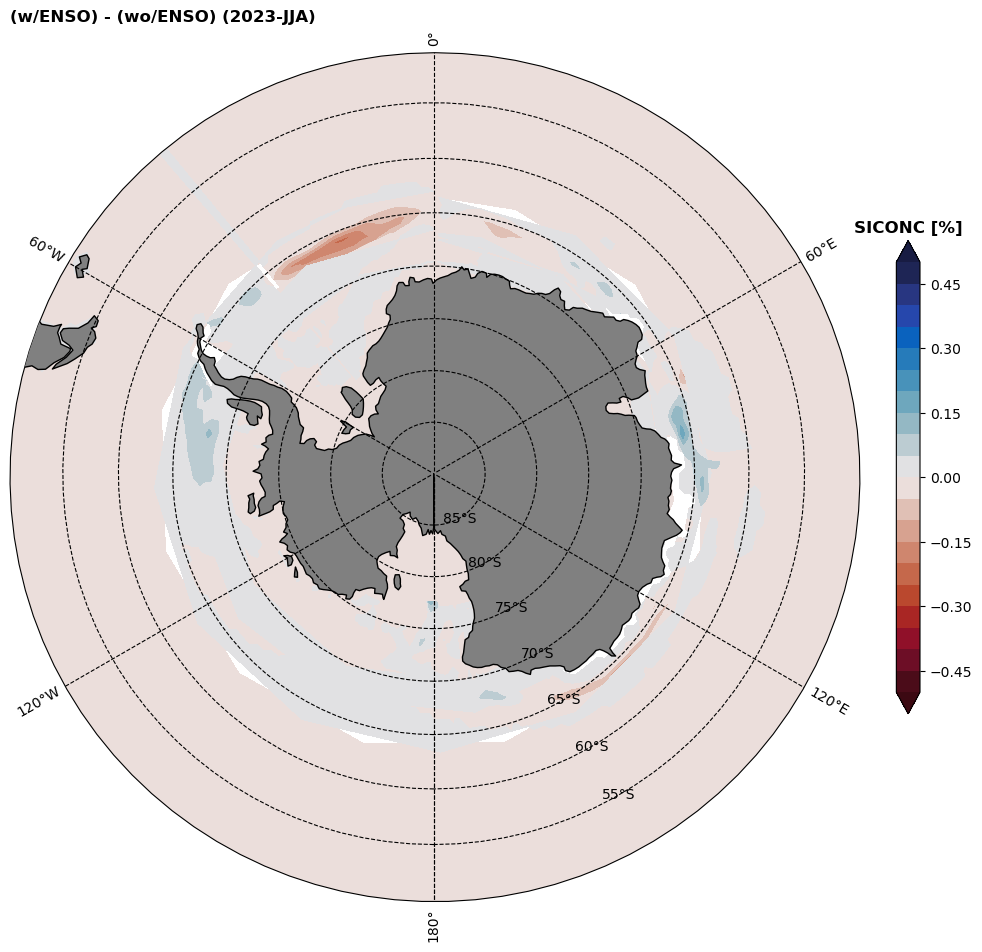

In [15]:
save_info = {
    "save": True,
    "path": "../visualize/figures/no_enso.png",
    "dpi": 1200,
}

cmap_info = {
    "cmap": cmocean.cm.balance_r,
    "units": "SICONC [%]",
    "shared": True,
    "levels": np.arange(-.5, .55, .05),
}

cesm2_diff = {
    "title": "(w/ENSO) - (wo/ENSO) (2023-JJA)",
    "ds": diff.resample(time="QS-DEC").mean(dim="time").sel(time="2023-06").squeeze(),
}

spatial_obs_plot(
    dfs={
        "cesm_enso": cesm2_diff, 
    }, 
    cmap_info=cmap_info, 
    save_info=save_info, 
)